---
title: Plane Waves and Math Review - Homework 01
date: 2025-01-12
authors:
  - name: Professor Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

This is the first homework assignment for *Lasers and Optomechanics* at Syracuse University.

<span style="color:#ff5555;">**It is due 5pm on Friday, January 23, 2026**</span>

**You will need to complete the questions in this jupyter notebook and submit it via your `git` repo**


### Caroline Capuano
#### Homework 1 Submission

In [ ]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": True,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

**<span style="color:#ffaaff;">Approximations Review</span>**

In this course, you will need to remember and use some basic approximations.\
These approximations all come from taking the [*Taylor Expansion*](https://en.wikipedia.org/wiki/Taylor_series) of a function $f(x)$ about some point $x = a$:
$$f(x)\Bigr|_{x \rightarrow a} \approx f(a) + f'(a) (x-a) + \dfrac{1}{2!} f''(a) (x-a)^2 = \displaystyle \sum_{n=0}^\infty \dfrac{f^{(n)}(a)}{n!}(x - a)^n$$


# <span style="color: #ff5500">Question 1: Binomial Approximation</a>
The binomial approximation to first order in $x$ is as follows:
\begin{align}
(1 + x)^{n} \approx 1 + n x.
\end{align}

## <span style="color:#ccccff;">Question 1A</span>
Derive the binomial approximation using the Taylor Expansion to first order about $x = 0$

My Solution: 


$$
f(x) = (1 + x)^{n} 
$$

\begin{align}
f(x) \Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x 
\end{align}

$$
f(0) = 1
$$
$$
f'(x) = (n)(1+x)^{n-1} 
$$
$$
f'(0) = n 
$$

So, the taylor approximation of this function is:

\begin{align}
f(x) \Bigr|_{x \rightarrow 0} &\approx 1+nx
\end{align}

## <span style="color:#ccccff;">Question 1B</span>
Find the second and third order terms of the binomial approximation

My solution:

\begin{align}
f(x) \Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x  + f''(x)x^2/2! + f'''(x)x^3/3! \\

\end{align}

I will substitute in my previous solution:

\begin{align}
f(x) \Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x &\approx 1+nx
\end{align}

and...

$$
f''(x) = n(n-1)(1+x)^{n-2}
$$

Substituting x = 0:

$$
f''(0) = n(n-1)
$$

and lastly, the tripple derivative:

$$
f''(x) = n(n-1)(n-2)(1+x)^{n-3}
$$

$$
f'''(0) = n(n-1)(n-2)
$$

Plugging this all together, the second order expansion is:

\begin{align}
f(x) \Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x  + f''(x)x^2/2!  &\approx  1+nx + n(n-1)x^2/2 

\end{align}

Plugging this all together, the third order expansion is:

\begin{align}
f(x) \Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x  + f''(x)x^2/2! + f'''(x)x^3/3! &\approx  1+nx + n(n-1)x^2/2! + n(n-1)(n-2) x^3/3!

\end{align}

This simplies to:

\begin{align}
f(x) \Bigr|_{x \rightarrow 0}  &\approx  1+nx + n(n-1)x^2/2 + n(n-1)(n-2) x^3/6

\end{align}


## <span style="color:#ccccff;">Question 1C</span>
Plot the binomial function on $x \in [-1, 1]$ for $n = \dfrac{1}{2}$.\
Compare to plots of the first, second, and third order binomial approximation.\
At what $x > 0$ does each approximation fail, becoming greater than 5\% error?

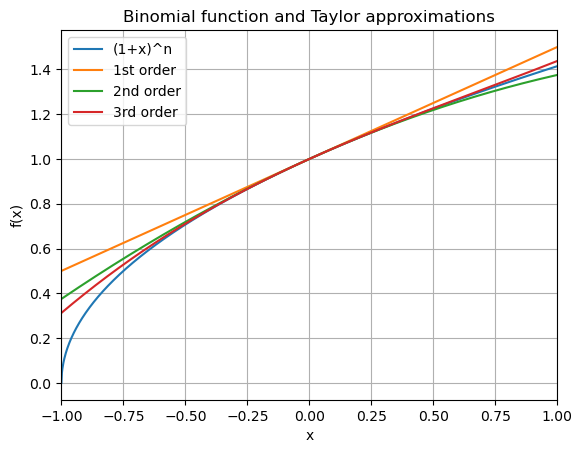

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting Functions
n = 0.5
x = np.linspace(-1, 1, 1000)


binomial_fun = (1+x)**n

first_taylor = 1 + n*x
second_taylor = first_taylor + (n*(n-1)*x**2)/2
third_taylor = second_taylor + (n*(n-1)*(n-2)*x**3)/6

plt.figure()
plt.plot(x, binomial_fun, label='(1+x)^n')
plt.plot(x, first_taylor,  label='1st order')
plt.plot(x, second_taylor, label='2nd order')
plt.plot(x, third_taylor,  label='3rd order')

plt.xlim(-1, 1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Binomial function and Taylor approximations')
plt.grid(True)
plt.legend()
plt.show()

In [2]:
# Calculating and plotting errors

first_taylor_error = np.abs(binomial_fun - first_taylor)/np.abs(binomial_fun)
second_taylor_error = np.abs(binomial_fun - second_taylor)/np.abs(binomial_fun)
third_taylor_error = np.abs(binomial_fun - third_taylor)/np.abs(binomial_fun)

threshold = 0.05 # 5% error



/var/folders/s_/6p5x_skj3dd71gqpk1pr7t980000gn/T/ipykernel_2336/2504398434.py:3: RuntimeWarning: divide by zero encountered in divide
  first_taylor_error = np.abs(binomial_fun - first_taylor)/np.abs(binomial_fun)
/var/folders/s_/6p5x_skj3dd71gqpk1pr7t980000gn/T/ipykernel_2336/2504398434.py:4: RuntimeWarning: divide by zero encountered in divide
  second_taylor_error = np.abs(binomial_fun - second_taylor)/np.abs(binomial_fun)
/var/folders/s_/6p5x_skj3dd71gqpk1pr7t980000gn/T/ipykernel_2336/2504398434.py:5: RuntimeWarning: divide by zero encountered in divide
  third_taylor_error = np.abs(binomial_fun - third_taylor)/np.abs(binomial_fun)


## Question 1A Solution: <span style="color:#ff5555;">(This example filled out for you)</span>
Let $$f(x) = (1 + x)^n,$$ 
then at $x = 0$, $$f(0) = 1.$$
Then the first derivative $f'(x)$ is $$f'(x) = n (1 + x)^{n-1}$$
and the derivative evaluated at $x = 0$ is $$f'(0) = n$$

The Taylor Expansion to first order then becomes 
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x\\~\\
&= 1 + n x
\end{align}

## Question 1B Solution:
Taking the second and third derivatives, and evaluating at 0 yields
\begin{align}
f''(x) &= n (n-1) (1 + x)^{n-2} \\
f'''(x) &= n (n-1) (n-2) (1 + x)^{n-3} \\~\\
f''(0) &= n (n-1)\\
f''(0) &= n (n-1) (n-2)
\end{align}

The second order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2
\end{align}

The third order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2 + \dfrac{1}{3!} f'''(0) x^3\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2 + \dfrac{1}{6} n (n-1) (n-2) x^3
\end{align}

In [7]:
def binom(xx:float, nn:float):
    """Binomial function (1 + xx)^nn
    
    Inputs:
    -------
    xx: float or array of floats
        binomial variable
    nn: float
        binomial exponent

    Output:
    -------
    binom: float or array of floats
        binomial expansion
    """
    return (1 + xx)**nn

In [8]:
# Parameter definitions.  Protip: never make single-letter variable names
nn = 0.5
xx = np.linspace(-1, 2, 100)

taylor0 = 1
taylor1 = taylor0 + nn * xx
taylor2 = taylor1 + 0.5 * nn * (nn - 1) * xx**2
taylor3 = taylor2 + (1/6) * nn * (nn - 1) * (nn - 2) * xx**3

In [9]:
# At which x does the error become greater than 10%?
# First, we divide the approximation by the real function,
# Second, we subtract 1 from that ratio
# Third, we take the absolute value of the subtraction
# Fourth, we look for the first location where the final result is greater than 0.1
# Fifth, we find where x > 0
# Sixth, we take the intersection of the indices found
# Seventh, we find the first index where the error is large for plotting
error = 0.05
model = binom(xx, nn)

xx_errors = np.array([])
for taylor in [taylor1, taylor2, taylor3]:
    abs_errors = np.abs(taylor/model - 1) # final result
    indices_error = np.argwhere(abs_errors > error)
    indices_x = np.argwhere(xx > 0)
    
    indices_final = np.intersect1d(indices_error, indices_x)
    index = indices_final[0]
    
    xx_errors = np.append(xx_errors, xx[index])
print(xx_errors)

[0.87878788 1.3030303  1.42424242]


/var/folders/s_/6p5x_skj3dd71gqpk1pr7t980000gn/T/ipykernel_79216/3003632814.py:14: RuntimeWarning: divide by zero encountered in divide
  abs_errors = np.abs(taylor/model - 1) # final result


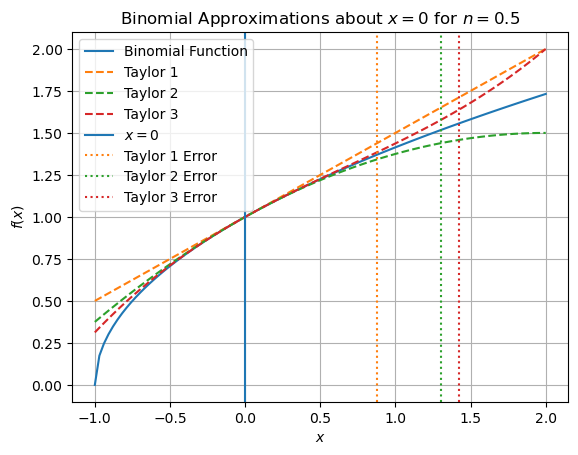

In [10]:
fig, s1 = plt.subplots(1)

s1.plot(xx, binom(xx, nn), label="Binomial Function")
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")
s1.plot(xx, taylor3, ls="--", label="Taylor 3")

s1.axvline(x=0, label=f"$x = 0$")

for ii, xx_error in enumerate(xx_errors):
    s1.axvline(x=xx_error, color=f"C{ii+1}",ls=":", label=f"Taylor {ii+1} Error")

s1.set_title("Binomial Approximations about $x = 0$ for $n = " + f"{nn}" + "$")
s1.set_xlabel("$x$")
s1.set_ylabel("$f(x)$")
s1.legend()
s1.grid()
plt.show()

# <span style="color: #ff5500">Question 2: Sine and Cosine Approximations</a>

## Question 2A: Sine 
Repeat the Taylor Expansion approximations for sine  to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.


#### Question 2A Solution (I wend to third order because second term is 0)

Taylor Approximation up to the third order for a function about x=0 is the following:

$ f(x)\approx f(0)+f'(0)\,x+\frac{f''(0)}{2!}\,x^2+\frac{f^{(3)}(0)}{3!}\,x^3 $

##### For Sine
$ \quad \quad f(x=0) = \sin{x=0} = 0 $

$ \quad \quad f'(x=0) = \cos{x=0} = 1 $

$ \quad \quad f''(x=0) = \sin{x=0} = 0 $

$ \quad \quad f'''(x=0) = \cos{x=0} = 1 $


$ \quad \sin x \approx x - \frac{x^3}{3!} = x - \frac{x^3}{6}. $


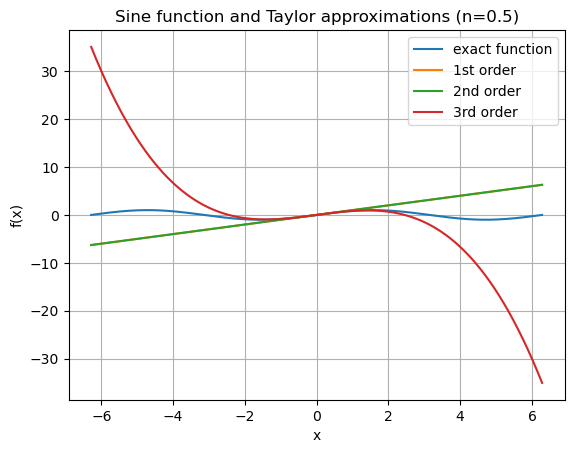

In [3]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

function = np.sin(x)

first_taylor = x
second_taylor = first_taylor + 0
third_taylor = second_taylor - (x**3)/6


plt.figure()
plt.plot(x, function, label='exact function')
plt.plot(x, first_taylor,  label='1st order')
plt.plot(x, second_taylor, label='2nd order')
plt.plot(x, third_taylor, label='3rd order')



plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Sine function and Taylor approximations (n={n})')
plt.grid(True)
plt.legend()
plt.show()


## Question 2B: Cosine
Repeat the Taylor Expansion approximations for cosine to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.


#### Question 2B Solution

##### For Cosine:
$ \quad \quad f(x=0) = \cos{x=0} = 1 $

$ \quad \quad f'(x=0) = \sin{x=0} = 0 $

$ \quad \quad f''(x=0) = - \cos{x=0} = -1 $


$ \quad \sin x \approx 1 -\frac{x^2}{2!} = 1 - \frac{x^2}{2}. $


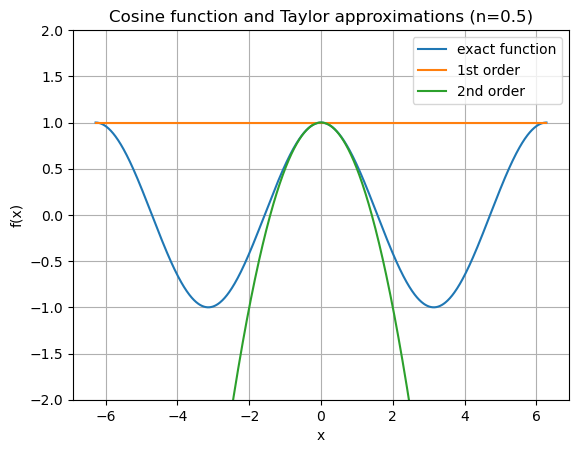

In [4]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

function = np.cos(x)

first_taylor = 1
second_taylor = first_taylor - x**2/2


plt.figure()
plt.plot(x, function, label='exact function')
plt.plot(x, first_taylor*np.ones_like(x),  label='1st order')
plt.plot(x, second_taylor, label='2nd order')


plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-2,2)
plt.title(f'Cosine function and Taylor approximations (n={n})')
plt.grid(True)
plt.legend()
plt.show()

# <span style="color: #ff5500">Question 3: Complex Number Review</a>

## Question 3A:
Plot the following complex function on a domain of $\phi \in [0, 2 \pi]$:
\begin{align}
z_1(\phi) &= 2 + e^{i \phi}\\
z_2(\phi) &= \dfrac{3}{2 - e^{i \phi}}\\
z_3(\phi) &= e^{(\sigma + i \omega) t}
\end{align}
where for $z_4$, $\sigma = -0.5$, and $\omega = 1$.

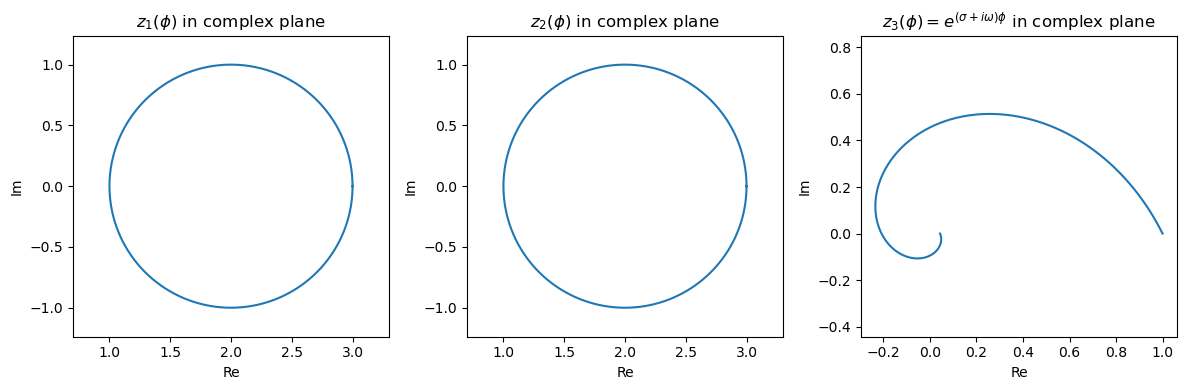

In [6]:
import numpy as np

phi = np.linspace(0, 2*np.pi, 1000)
sigma = -0.5
omega = 1
i = 1j

# functions

z_1 = 2 + np.exp(i * phi)
z_2 = 3/(2 - np.exp(i * phi))
z_3 = np.exp((sigma + i * omega) * phi ) # assuming t is phi

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(np.real(z_1), np.imag(z_1))
ax[0].set_title(r"$z_1(\phi)$ in complex plane")
ax[0].set_xlabel("Re"); ax[0].set_ylabel("Im")
ax[0].axis("equal")

ax[1].plot(np.real(z_2), np.imag(z_2))
ax[1].set_title(r"$z_2(\phi)$ in complex plane")
ax[1].set_xlabel("Re"); ax[1].set_ylabel("Im")
ax[1].axis("equal")

ax[2].plot(np.real(z_3), np.imag(z_3))
ax[2].set_title(r"$z_3(\phi)=e^{(\sigma+i\omega)\phi}$ in complex plane")
ax[2].set_xlabel("Re"); ax[2].set_ylabel("Im")
ax[2].axis("equal")

plt.tight_layout()
plt.show()


## Question 3B:
Calculate the magnitude $r(\phi)$ and argument $\theta(\phi)$ for each $z_i$.



The magnitude is $r(\phi)=|z(\phi)|=\sqrt{\Re(z(\phi))^2+\Im(z(\phi))^2}$.

And the phase is calculated by finding the angle between: 

$ \theta(\phi) = \arg\big(z(\phi)\big)
= \operatorname{atan2}\!\left(\Im\!\big(z(\phi)\big),\, \Re\!\big(z(\phi)\big)\right) $


#### For $z_1(\phi)$

$ \quad z_1(\phi) =  2 + e^{i * \phi}  $

$ \quad e^{i * \phi} = \cos{\phi} + i \sin{\phi} $

$ \quad z_1(\phi) = 2 + \cos{\phi} + i \sin{\phi} $

The magnitude is:

$ \quad r_1(\phi) = \sqrt{{2 + \cos{\phi}}^2 + (\sin{\phi})^2} = \sqrt{5 + 4 \cos{\phi}}$

And the phase is:

$ \quad \theta_1(\phi) = \operatorname{atan2}\!\left(\sin{\phi}\big),\, 2 + \cos{\phi}\!\big(z(\phi)\big)\right)$


#### For $z_2(\phi)$

$ \quad z_2(\phi) =  3/(2 - e^{i * \phi}) = 3/(2 + \cos{\phi} + i \sin{\phi})$


The magnitude is:

$ \quad r_1(\phi) = \sqrt{{2 - \cos{\phi}}^2 + (\sin{\phi})^2} = \sqrt{5 - 4 \cos{\phi}}$

And the phase is:

$ \quad \theta_1(\phi) = \operatorname{atan2}\!\left(\sin{\phi}\big),\, 2 - \cos{\phi}\!\big(z(\phi)\big)\right)$


#### For $z_3(\phi)$

$ z_3(\phi) = e^{(\sigma + i * \omega) * t } = e^{\sigma t} e^{i \omega t} = e^{\sigma t} (\cos{\omega t} + i \sin{\omega t}) = e^{\sigma t} \cos{\omega t} + e^{\sigma t}sin{\omega t} $

The magnitude is:

$ \quad r_1(\phi) = \sqrt{(e^{\sigma t} \cos{\omega t})^2 + (e^{\sigma t}sin{\omega t})^2} = e^{\sigma t} \sqrt{\cos^2{\omega t} +  \sin^2{\omega t} } = e^{\sigma t}$

And the phase is:


## Question 3C:
Calculate the velocity of the phasors with respect to $\phi$, and draw them for each $z_i$ evaluated at $\phi = \left\{0, \dfrac{\pi}{2}, \pi, \dfrac{3\pi}{2} \right\}$



## Question 3D:
What is the primary difference between $z_1$ and $z_2$?



## Question 3E:
For $z_3$, substitute $t$ for $\phi$, and calculate the normalized time derivatives : $\dfrac{\dot{z_3}}{z_3}$, $\dfrac{\ddot{z_3}}{z_3}$

and find expressions for the normalized real polar coordinates $\dfrac{\dot{r}}{r}, \dfrac{\ddot{r}}{r}, \dot{\theta}, \ddot{\theta}$.

Discuss how the expressions you found for the polar coordinates relate to the path you plotted for $z_3$ in part A.  

What happens if $\sigma = +0.5$?

# <span style="color: #ff5500">Question 4: Electric field propogating in 2D</a>
In class, we assumed that an plane wave was propogating in the $\hat{k} = \hat{z}$ direction, with the electric field oscillating in the $\hat{x}$ direction.\
Suppose now that the is oscillating in the $\dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})$ direction: 
\begin{align}
\boldsymbol{E} = E_0 \cos(\vec{k} \cdot \vec{r} - \omega t) \dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})
\end{align}

## Question 4A:
What direction of propogation $\hat{k}$ and magnetic field vector $\boldsymbol{B}$ are now possible?\
Draw a diagram of the electric field vector and the plane of propogation.

$
\quad \tilde{\mathbf B}(\mathbf r,t)=\frac{1}{c}\,\hat{\mathbf k}\times \tilde{\mathbf E},
$

$  \quad \hat{\mathbf{k}} = (k_x, k_y, k_z) $

The electric field is oscillating in the $\hat{x}$ and $\hat{y}$ direction. If $\hat{k} \cdot \hat{E} = 0$, then $\hat{k}$ must be a unit vector perpendicular to the electric field

$ \quad k_x + k_y = 0 $ and $ -k_x = k_y $.

For the direction of the magnetic field determined by the cross product between the propogration $\hat{k}$ vector and the Electric field:

$
\quad \tilde{\mathbf B}(\mathbf r,t)=\frac{1}{c}\,\hat{\mathbf k}\times \tilde{\mathbf E},
$







![Electric Field Vector](images/electric_field_vector.png)
![Plane of propogation](images/plane_of_propogation.png)


## Question 4B:
What are the expressions for $\hat{k}$ and $\boldsymbol{B}$ if we constrain the direction of propogating to be (partially) in the positive $\hat{x}$ direction? 

# <span style="color: #ff5500">Question 5: Spherical Plane Wave Intensity and Radiation Pressure</a>

Suppose you have a sinusoidal spherical plane wave source a distance $d$ away along the $\hat{z}$ axis from a cylindrical mirror with radius $a$.\
Use the center of the spherical wave as the origin, and the distance from that center as the variable $r$.\
Assume that the cylinder is in the $xy$ plane.\
Also assume that the spherical wave is emitting total power $P_\mathrm{total}$ in all directions.


## Question 5A:
What is the Poynting vector $\boldsymbol{S}$ for the spherical waves?\
*Hint: Equation 9.49 of Griffith's E&M may be helpful here*

Equation 9.49 from Griffiths includes the electric and magnetic field equations:

$
\quad \tilde{\mathbf E}(\mathbf r,t)=\tilde E_0\,e^{i(\mathbf k\cdot\mathbf r-\omega t)}\,\hat{\mathbf n} $

$
\quad \tilde{\mathbf B}(\mathbf r,t)=\frac{1}{c}\,\hat{\mathbf k}\times \tilde{\mathbf E},
$

The Poynting vector S is:

$ \quad \mathbf S(\mathbf r,t)=\frac{1}{\mu_0}\,\mathbf E(\mathbf r,t)\times \mathbf B(\mathbf r,t) $

Substituting in equations from 9,49 from Griffiths into the Poynting vector equation:

$ \quad \mathbf S(\mathbf r,t)=\frac{1}{\mu_0}\,\mathbf (\tilde E_0\,e^{i(\mathbf k\cdot\mathbf r-\omega t)}\,\hat{\mathbf n})\times \mathbf (\frac{1}{c}\,\hat{\mathbf k}\times \tilde{\mathbf E},
) $

Using the vector identity $\mathbf A\times(\mathbf B\times\mathbf C)=\mathbf B(\mathbf A\cdot\mathbf C)-\mathbf C(\mathbf A\cdot\mathbf B)$,

$ 
\quad \tilde{\mathbf E}\times(\hat{\mathbf k}\times\tilde{\mathbf E}^{\,*})
=\hat{\mathbf k}\,(\tilde{\mathbf E}\cdot\tilde{\mathbf E}^{\,*})
-\tilde{\mathbf E}^{\,*}(\tilde{\mathbf E}\cdot\hat{\mathbf k}).
$ 

For an electromagnetic wave, $\tilde{\mathbf E}\perp\hat{\mathbf k}$ so $\tilde{\mathbf E}\cdot\hat{\mathbf k}=0$, hence

$ 
\quad \tilde{\mathbf E}\times\tilde{\mathbf B}^{\,*}
=\frac{1}{c}\,|\tilde{\mathbf E}|^2\,\hat{\mathbf k}.
$ 

The phase factors cancel in $|\tilde{\mathbf E}|^2=\tilde{\mathbf E}\cdot\tilde{\mathbf E}^{\,*}$, so $|\tilde{\mathbf E}|^2=|\tilde E_0|^2$. So,

$ 
\boxed{\ \langle \mathbf S\rangle
=\frac{1}{2\mu_0 c}\,|\tilde E_0|^2\,\hat{\mathbf k}
=\frac{1}{2}\varepsilon_0 c\,|\tilde E_0|^2\,\hat{\mathbf k}\ }
= \frac{1}{2}\varepsilon_0 c\,|\tilde E_0|^2\,\hat{\mathbf r}
$ 

I think the easier way to think abou the poynting vector is by using the total power, which is the following for spherical waves

$ 
\boxed{\ \langle \mathbf S(r)\rangle=\frac{P_{\text{total}}}{4\pi r^2}\,\hat{\mathbf r}\ }.
$ 



## Question 5B:
What is the Poynting vector $\boldsymbol{S}$ incident on the mirror center?\
What about the mirror edge?\
Write an expression for the Poynting vector incident anywhere on the mirror's surface.



#### Incident on the Mirror's center:

Assuming the mirror is a distance d from the mirror:

$ \quad  \langle \mathbf S\rangle=\frac{1}{2}\varepsilon_0 c\,|\tilde E_0(d)|^2\,\hat{\mathbf z} $

#### Incident on the Mirror's Edge
Assuming the mirror is a distance d from the mirror, and a from the mirror's center:

$ \quad  r = \sqrt{b^2 + a^2} $

To find $ \hat{\mathbf{r}} $ :

$ \quad  \quad x = a \cos{\theta}$,

$ \quad  \quad y = a \sin{\theta}$,

$ \quad  \quad z = d $

So,

$ \quad \mathbf{r} = a \cos{\theta} \hat{\mathbf{x}} + a \sin{\theta} \hat{\mathbf{y}} + d \hat{\mathbf{z}}$

$ |\mathbf{r}| = \sqrt{x^2 + y^2 + z^2}  = \sqrt{(a \cos{\theta})^2 + (a  \sin{\theta})^2 + (d)^2} = \sqrt{a^2 + d^2}$

$ \hat{\mathbf{r}} = \frac{\mathbf{r}}{|\mathbf{r}| }  = \frac{a \cos{\theta} \hat{\mathbf{x}} + a \sin{\theta} \hat{\mathbf{y}} + d \hat{\mathbf{z}}}{\sqrt{a^2 + d^2}}$

So, the Poynting vector when incident on the mirror's edge is:

$ \quad  \langle \mathbf S\rangle=\frac{1}{2}\varepsilon_0 c\,|\tilde E_0(\sqrt{b^2 + a^2})|^2\,\hat{\mathbf r} = \frac{1}{2}\varepsilon_0 c\,|\tilde E_0(r)|^2\,\frac{a \cos{\theta} \hat{\mathbf{x}} + a \sin{\theta} \hat{\mathbf{y}} + d \hat{\mathbf{z}}}{\sqrt{a^2 + d^2}} $



#### Incident anywhere on Mirror

## Question 5C:
Using your result from Question 5B, find the intensity $I$ incident on the mirror.



In [ ]:
intensity = 

## Question 5D:
Find the total power $P$ incident on the mirror.\
Compare to the total power emitted by the spherical plane wave.



In [ ]:
tot_power = 

## Question 5E: 
Calculate the radiation pressure $p_\mathrm{rad}$ incident on the mirror.\
Also find the radiation pressure force $F_\mathrm{rad}$.\
Assume the mirror is a perfect reflector.\
If the mirror has a mass $m$, what is its acceleration?

In [ ]:
n = 1 # reflected off of mirror once
theta = np.deg2rad(45) # angle of incidence in radians
c = 3e8 # speed of light in m/s

radiation_pressure = intensity * np.cos(theta)/ c 

print(f"Radiation pressure at a {theta} degrees angle of incidence is: {radiation_pressure} N/(W/m^2)")


Radiation pressure at a 0.7853981633974483 degrees angle of incidence is: 4.714045207910317e-09 N/(W/m^2)


In [ ]:
force = radiation_pressure * tot_power

print(f"Force exerted on the mirror is: {force} N")

In [ ]:
mass = 0.01 # mass of the mirror in kg

acceleration = force / mass

print(f"Acceleration of the mirror is: {acceleration} m/s^2")